In [77]:
import seaborn as sns
from itertools import combinations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
# load and investigate the data here:

tennis_stats = pd.read_csv('tennis_stats.csv')

tennis_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

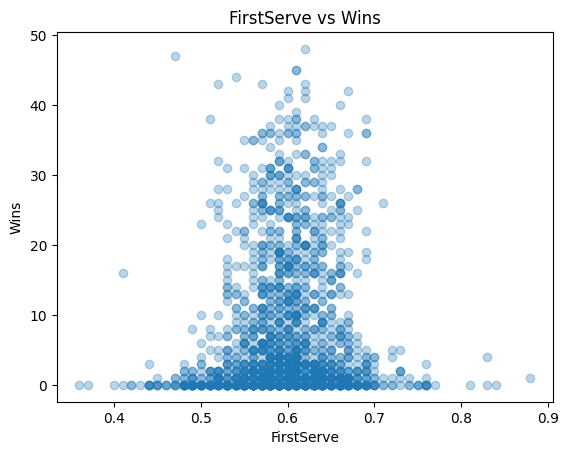

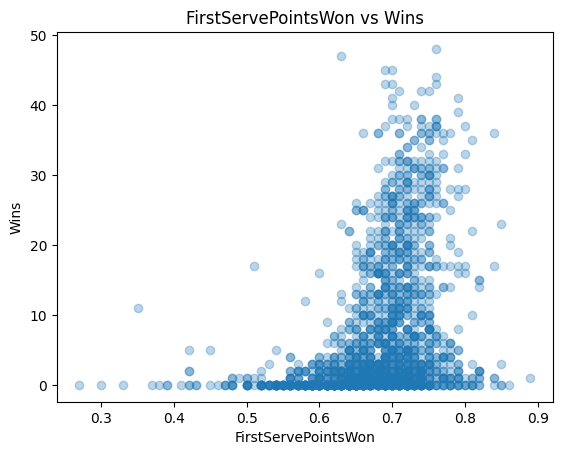

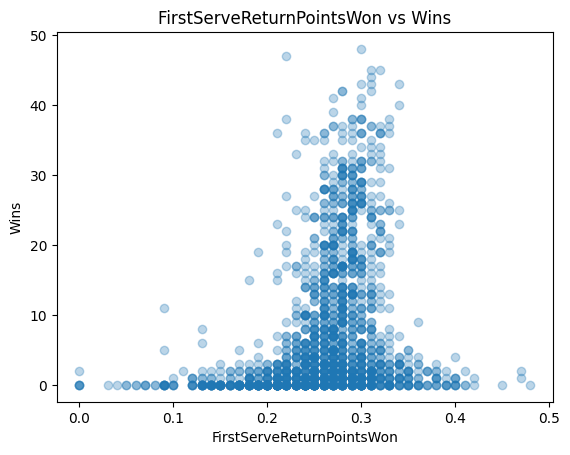

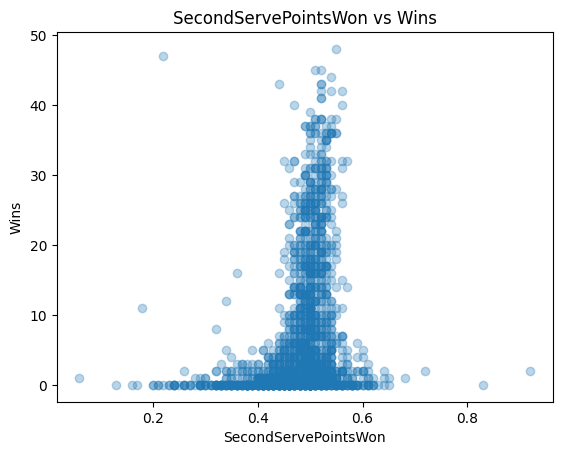

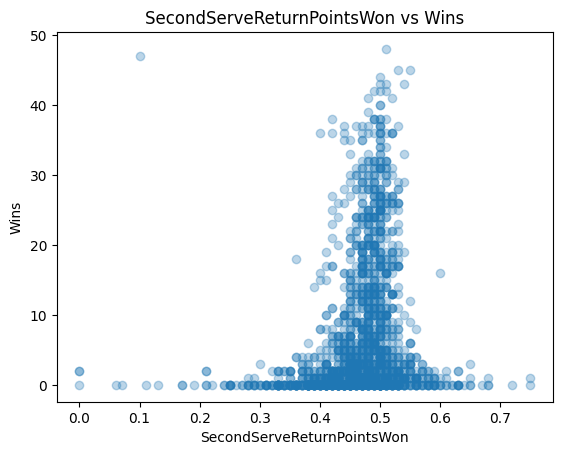

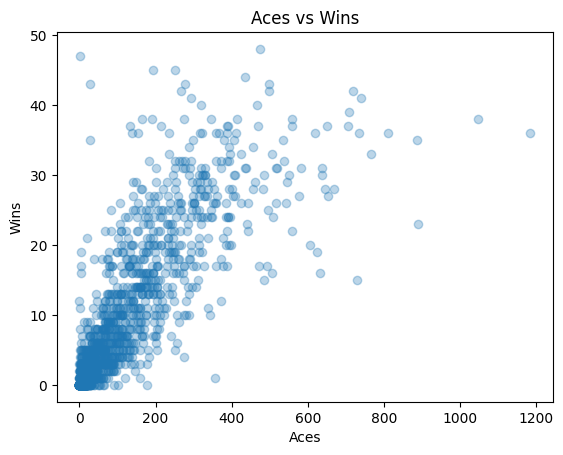

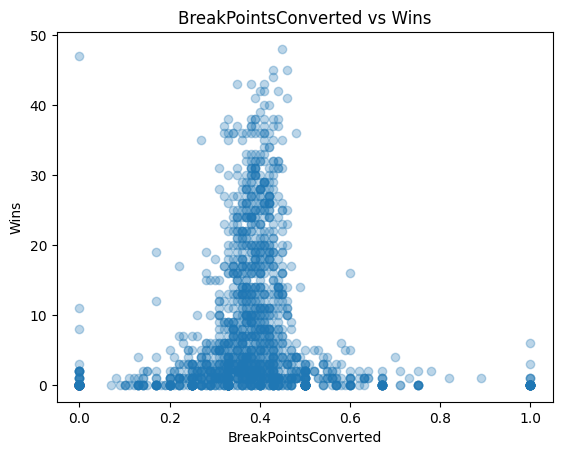

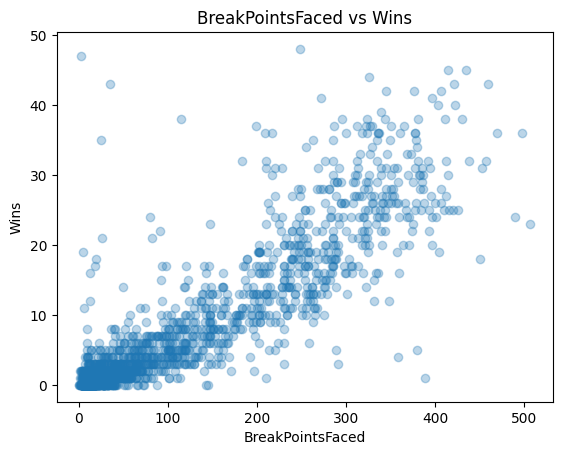

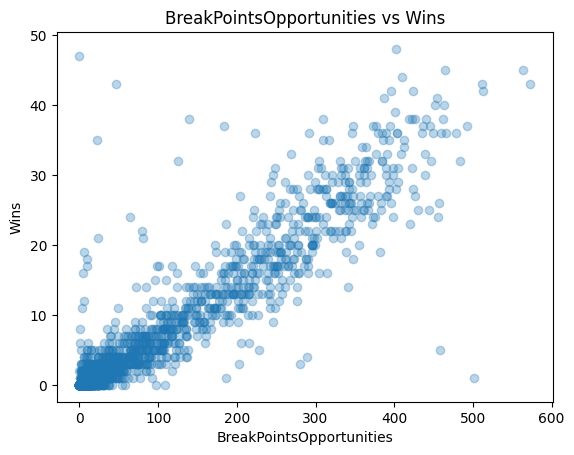

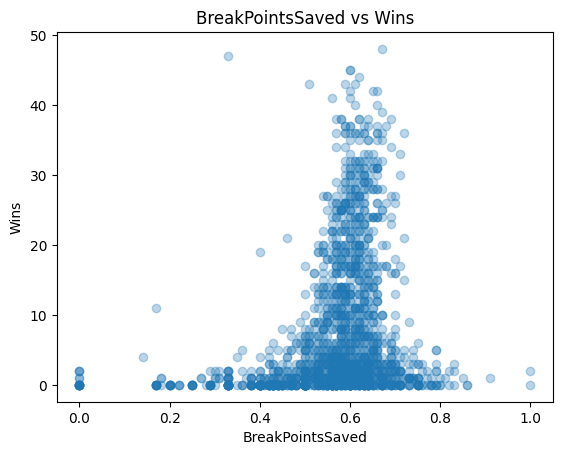

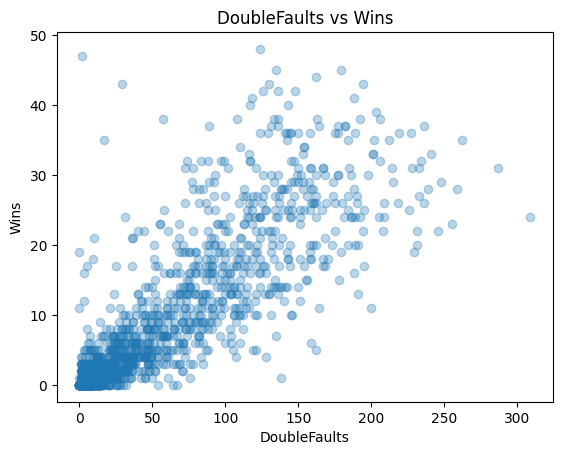

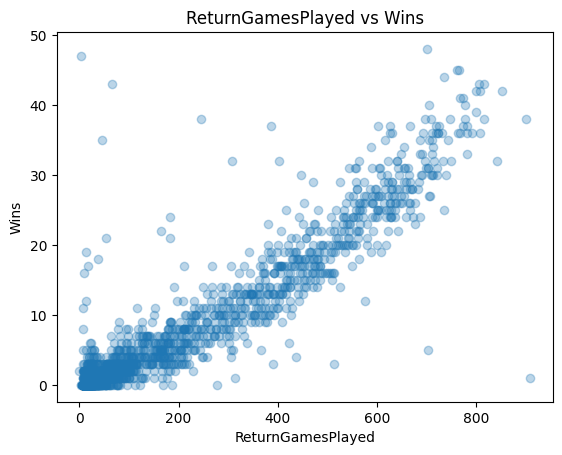

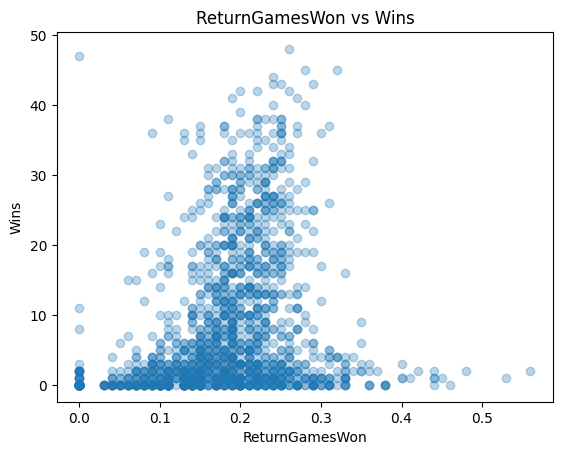

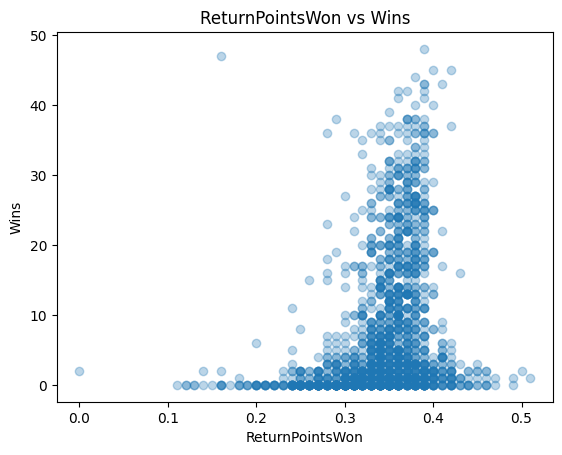

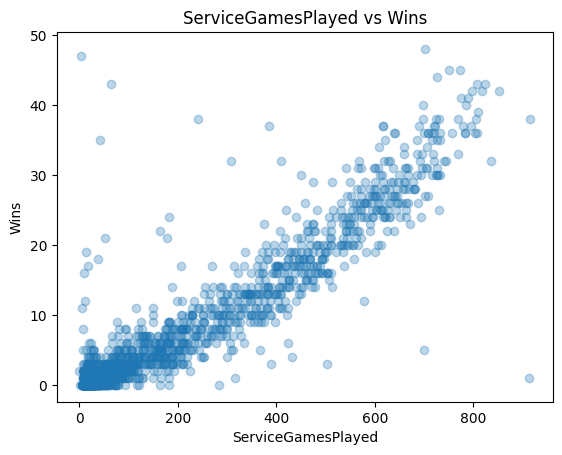

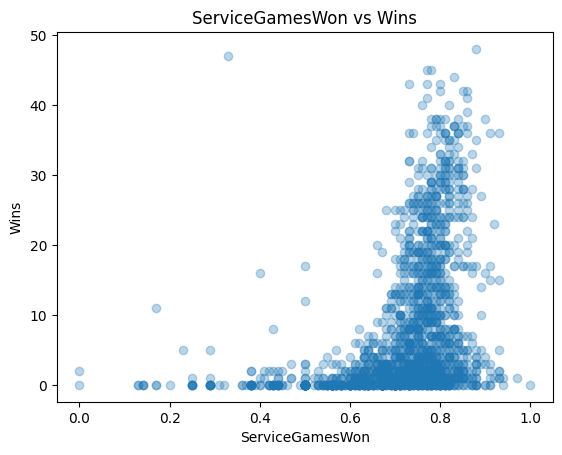

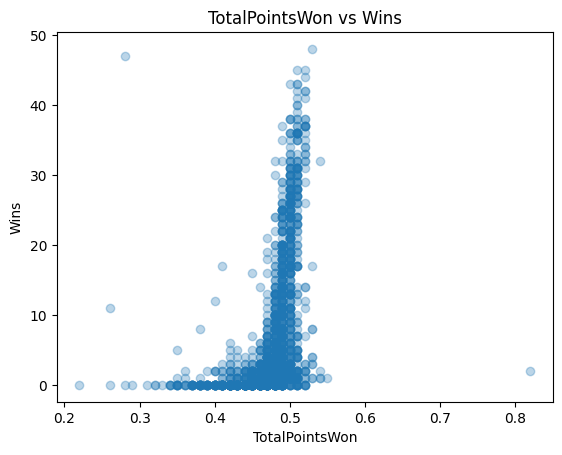

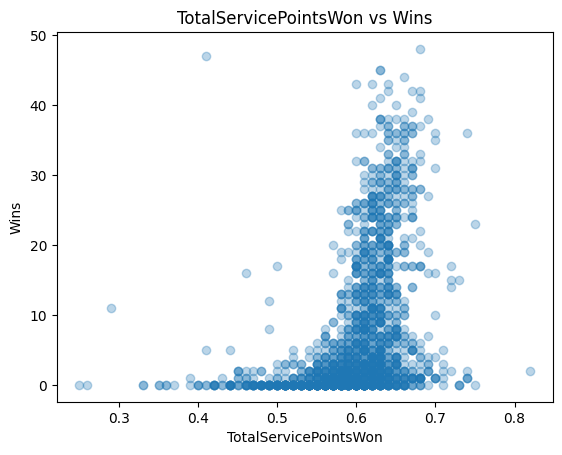

<Figure size 640x480 with 0 Axes>

In [69]:
# perform exploratory analysis here:
Wins = tennis_stats.Wins
Losses = tennis_stats.Losses
Winnings = tennis_stats.Winnings
Ranking = tennis_stats.Ranking
avoid_columns = ['Wins', 'Player', 'Losses', 'Winnings', 'Ranking', 'Year']
for column in tennis_stats.columns:
    if column not in avoid_columns:
        plt.scatter(tennis_stats[column], Wins, alpha=0.3)
        plt.xlabel(column)
        plt.ylabel('Wins')
        plt.title(column + ' vs Wins')
        plt.show()
        plt.clf()



In [ ]:
# These features all appear to have positive correlation with wins: Aces, BreakPointsFaced, BreakPointsOpportunities, DoubleFaults, ReturnGamesPlayed, ServiceGamesPlayed,

Test Score - Aces:  0.6626421969769964


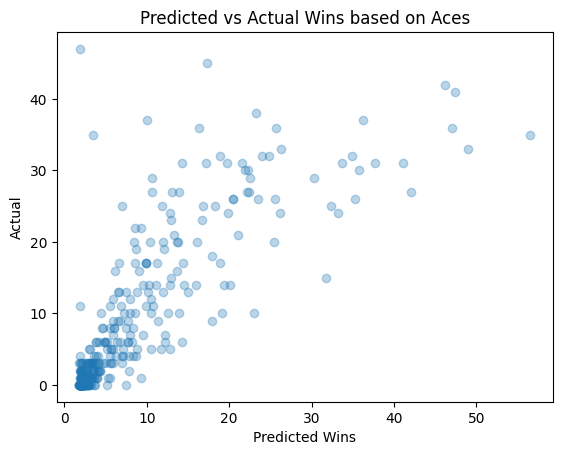

Test Score - BreakPointsFaced:  0.7525612055787849


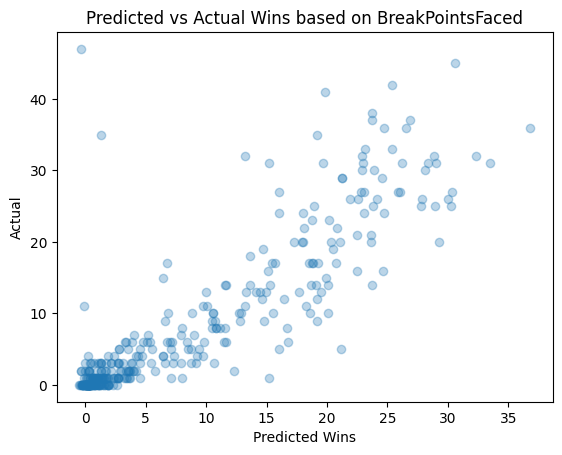

Test Score - BreakPointsOpportunities:  0.8280071088197527


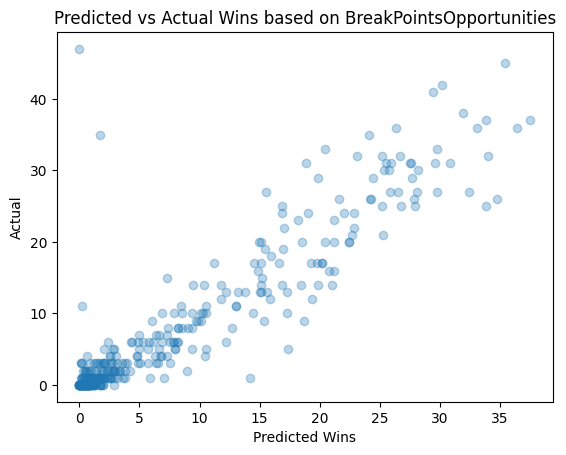

Test Score - DoubleFaults:  0.6843182184529526


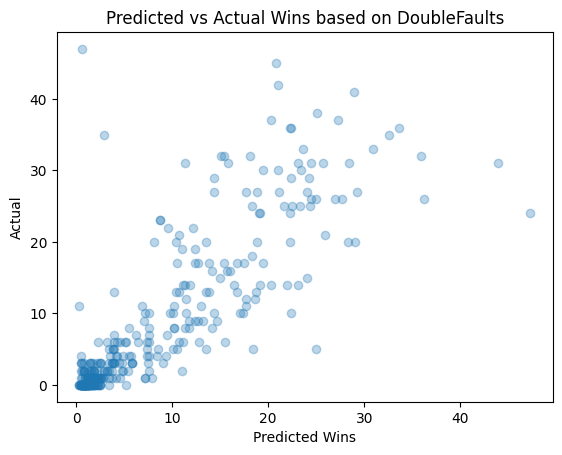

Test Score - ReturnGamesPlayed:  0.8466301923491759


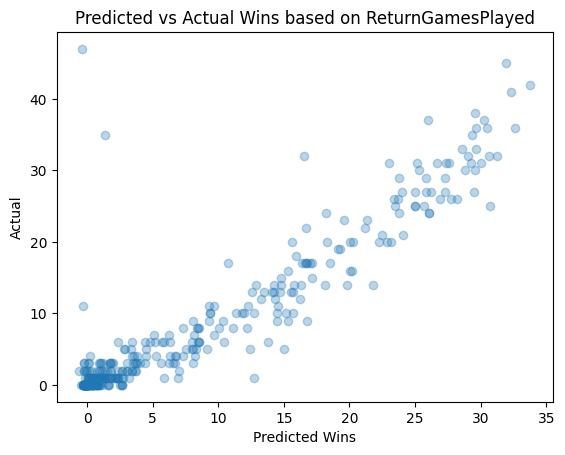

Test Score - ServiceGamesPlayed:  0.8482433568190804


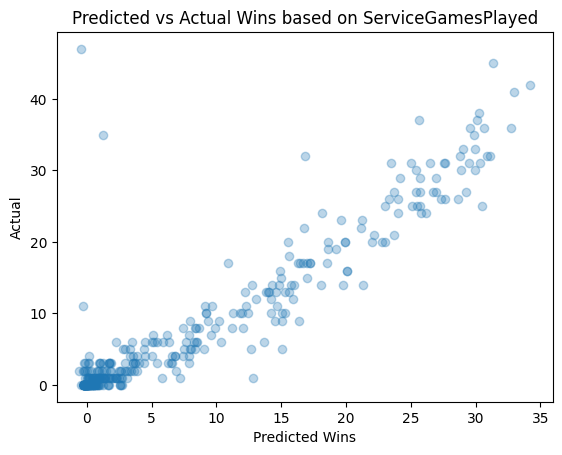

The best feature is ServiceGamesPlayed, with the highest test score of 0.8482433568190804


<Figure size 640x480 with 0 Axes>

In [93]:
## perform single feature linear regressions here:
highest_test_score = 0
best_feature = None

for column in tennis_stats.columns:
    if column in ['Aces', 'BreakPointsFaced', 'BreakPointsOpportunities', 'DoubleFaults', 'ReturnGamesPlayed', 'ServiceGamesPlayed']:
        x = np.array(tennis_stats[column]).reshape(-1,1)
        y = tennis_stats.Wins
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state=6)
        model = LinearRegression()
        model.fit(x_train, y_train)
        model.predict(x_test)
        test_score = model.score(x_test, y_test)
        print(f'Test Score - {column}: ', test_score)
        plt.scatter(model.predict(x_test), y_test, alpha=0.3)
        plt.xlabel('Predicted Wins')
        plt.ylabel('Actual')
        plt.title(f'Predicted vs Actual Wins based on {column}')
        plt.show()
        plt.clf()
        if test_score > highest_test_score:
            highest_test_score = test_score
            best_feature = column


print(f'The best feature is {best_feature}, with the highest test score of {highest_test_score}')

Test Score - Aces & BreakPointsFaced:  0.7990145092808741


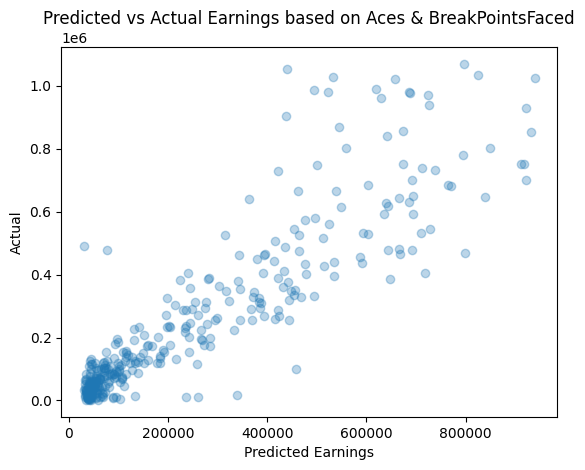

Test Score - Aces & BreakPointsOpportunities:  0.8218888075656878


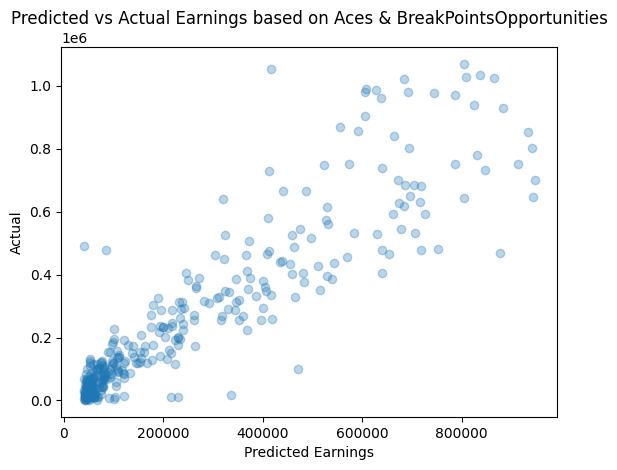

Test Score - Aces & DoubleFaults:  0.710079502126786


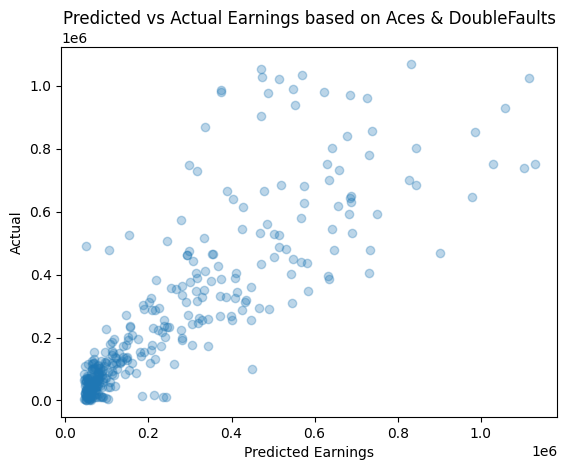

Test Score - Aces & ReturnGamesPlayed:  0.826416427260348


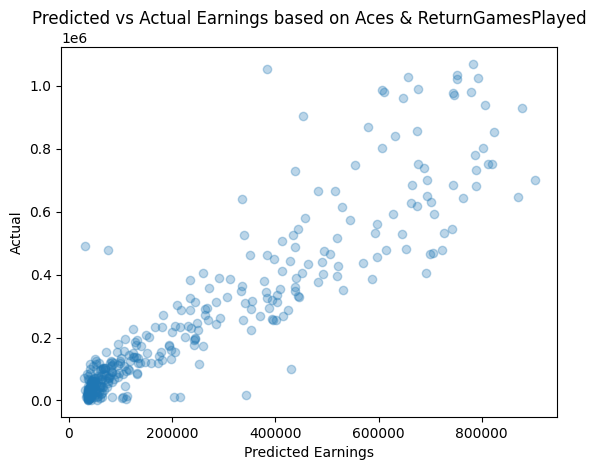

Test Score - Aces & ServiceGamesPlayed:  0.8261340336764726


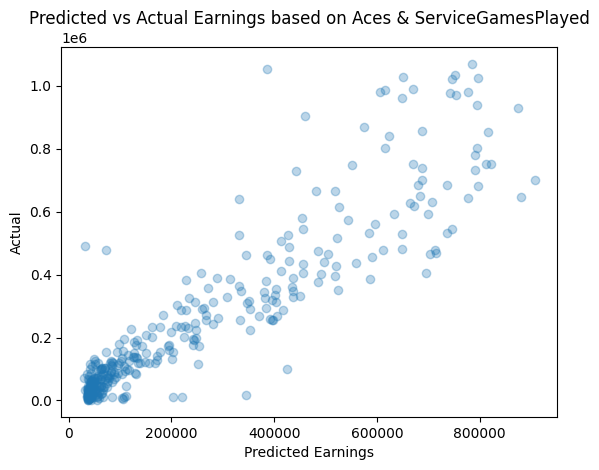

Test Score - BreakPointsFaced & BreakPointsOpportunities:  0.8080757302069909


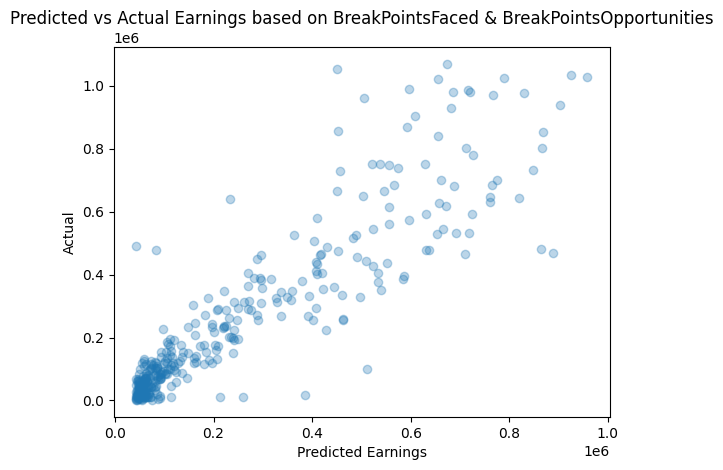

Test Score - BreakPointsFaced & DoubleFaults:  0.7685976278375963


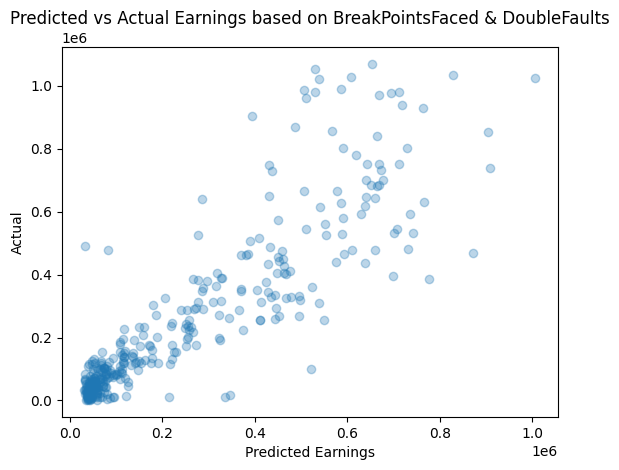

Test Score - BreakPointsFaced & ReturnGamesPlayed:  0.8284080839764851


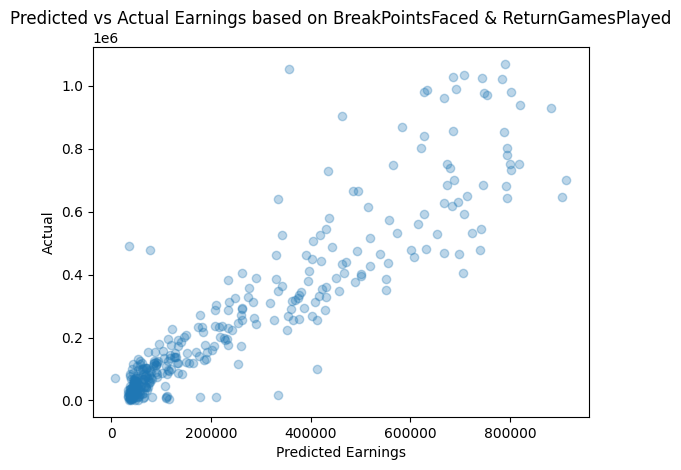

Test Score - BreakPointsFaced & ServiceGamesPlayed:  0.8274393911826475


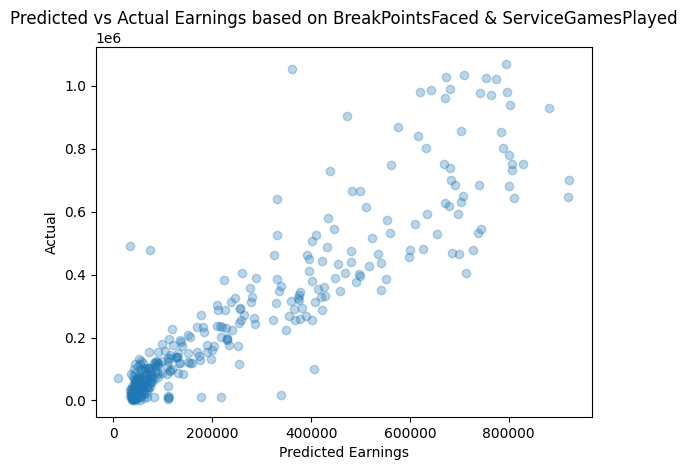

Test Score - BreakPointsOpportunities & DoubleFaults:  0.8089906671622742


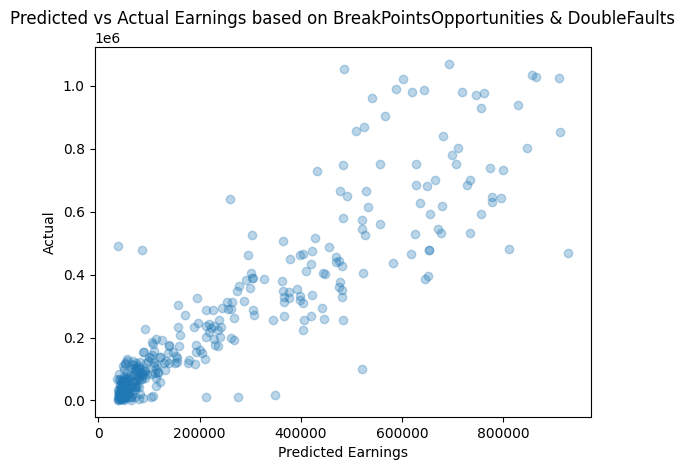

Test Score - BreakPointsOpportunities & ReturnGamesPlayed:  0.8306230858924168


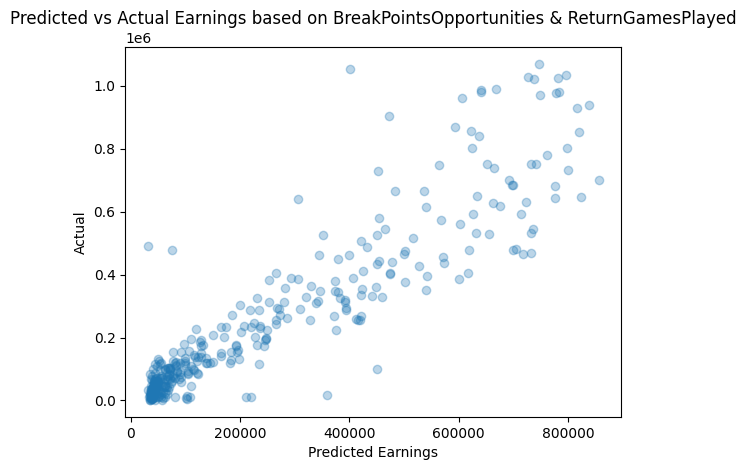

Test Score - BreakPointsOpportunities & ServiceGamesPlayed:  0.8303528220567031


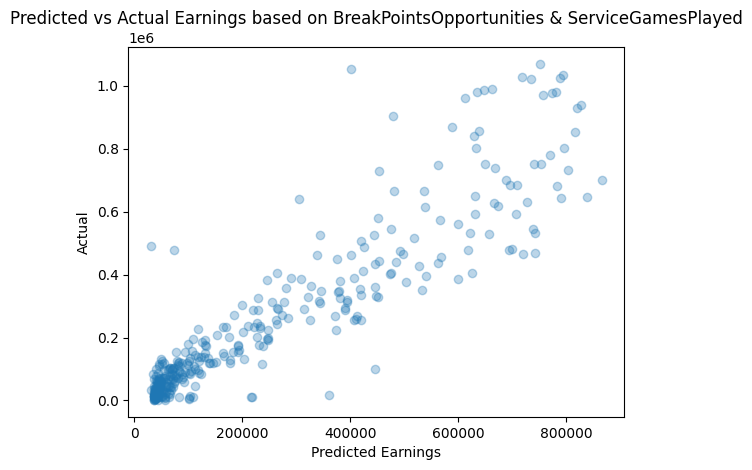

Test Score - DoubleFaults & ReturnGamesPlayed:  0.8253686009055955


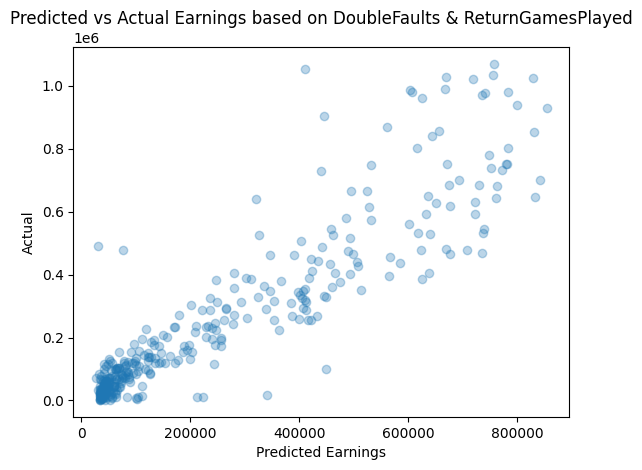

Test Score - DoubleFaults & ServiceGamesPlayed:  0.8250405943393885


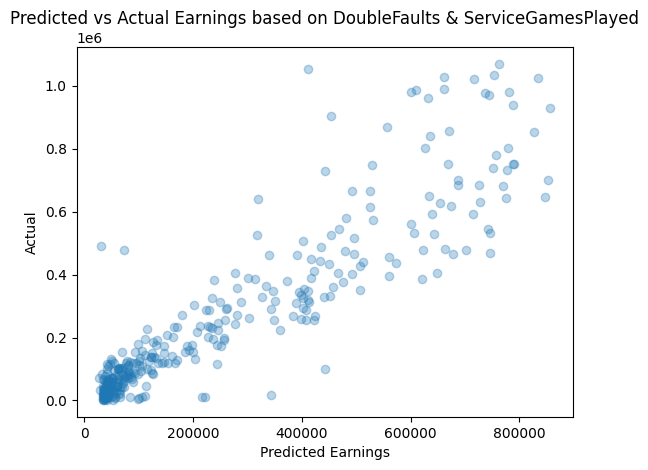

Test Score - ReturnGamesPlayed & ServiceGamesPlayed:  0.8266350130502309


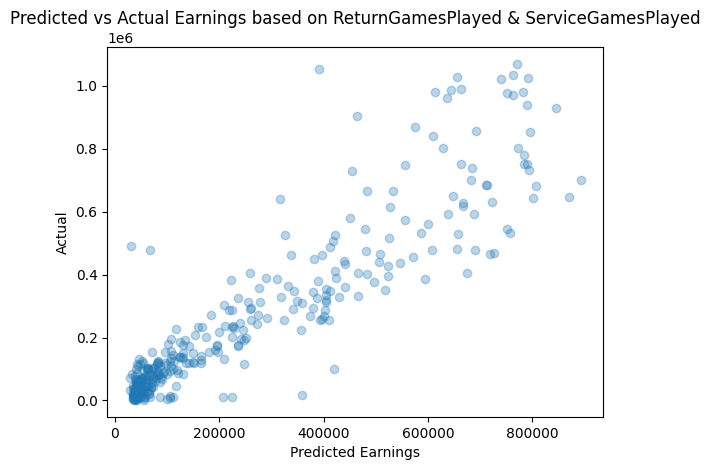

The best feature pair is ['BreakPointsOpportunities', 'ReturnGamesPlayed'], with the highest test score of 0.8306230858924168


<Figure size 640x480 with 0 Axes>

In [83]:
## perform two feature linear regressions here:

# The below code iterates through every possible combination of the selected features, creates a two feature regression, and then calculates the test score of the model. It then compares the scores to work out which combination is the most accurate.
highest_test_score = 0
best_feature_pair = None

for i, col1 in enumerate(['Aces', 'BreakPointsFaced', 'BreakPointsOpportunities', 'DoubleFaults', 'ReturnGamesPlayed', 'ServiceGamesPlayed']):
    for j, col2 in enumerate(['Aces', 'BreakPointsFaced', 'BreakPointsOpportunities', 'DoubleFaults', 'ReturnGamesPlayed', 'ServiceGamesPlayed']):
        if i >= j:
            continue
            
        x = tennis_stats[[col1, col2]]
        y = tennis_stats.Winnings
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state=6)
        model = LinearRegression()
        model.fit(x_train, y_train)
        test_score = model.score(x_test, y_test)
        print(f'Test Score - {col1} & {col2}: ', test_score)

        if test_score > highest_test_score:
            highest_test_score = test_score
            best_feature_pair = [col1, col2]
        
        plt.scatter(model.predict(x_test), y_test, alpha=0.3)
        plt.xlabel('Predicted Earnings')
        plt.ylabel('Actual')
        plt.title(f'Predicted vs Actual Earnings based on {col1} & {col2}')
        plt.show()
        plt.clf()

print(f'The best feature pair is {best_feature_pair}, with the highest test score of {highest_test_score}')

In [91]:
# Here I am going to every possible combinations of 5 different features, and train a regression model on them. Then we will compare the scores to see which combination has the highest score. 

considered_columns = [col for col in tennis_stats.columns if col not in avoid_columns] # avoiding identity and outcome columns.
combinations = list(combinations(considered_columns, 5))  

highest_test_score = 0
best_feature_combination = []

for cols in combinations:
    x = tennis_stats[list(cols)]
    y = tennis_stats.Winnings
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state=6)
    model = LinearRegression()
    model.fit(x_train, y_train)
    test_score = model.score(x_test, y_test)
    if test_score > highest_test_score:
        highest_test_score = test_score
        best_feature_combination = cols


print(f'The best feature combination is {best_feature_combination}, with the highest test score of {highest_test_score}')

The best feature combination is ('FirstServe', 'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved', 'ReturnGamesPlayed'), with the highest test score of 0.834759097152141


It turns out that the combination of 'FirstServe', 'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved', 'ReturnGamesPlayed' has the highest test score of 0.835. This shows a strong correlation between these features, and total winnings. Those who have high scores in each of these features will on average have high earnings. 